In [1]:
from classifiers import *
from helpers import*
from proj1_helpers import *
from preprocessing import preprocess
from validation import *
from plots import *

In [47]:
def train_model(y, x, l_rate, b_size, initial_w_dist):

        # (1) Pre-process
        y_train, tx_train = preprocess(
            y, x, "NanToMean", standardize_=True
        )

        print("Sanity check : n_variables = ", tx_train.shape[0], "n_features = ", tx_train.shape[1])

        # (2) Build k indices
        k_fold = 4  # using a default from the lab, can of course be tweaked
        seed = 1  # using a default from the lab, can of course be tweaked
        k_indices = build_k_indices(y_train, k_fold, seed)
        print(f"k-fold dimensions: {k_indices.shape[0]}, {k_indices.shape[1]}")

        # (3) Set up arrays in which the results of the k-fold will be stored
        acc_tr = []
        acc_te = []

        losses_tr = []
        losses_te = []

        clfiers = []

        for k in range(k_fold):
            test = k_indices[k]
            # print(f'k-test dimensions: {test.shape[0]}, {test.shape[1]}')
            train = []

            for i in range(len(k_indices)):
                if i is not k:
                    train.extend(k_indices[i])

            # (4) Get the train and test sets according to current k_index

            y_train_k = y_train[train]
            y_train_k = (y_train_k + 1) / 2
            y_test_k = y_train[test]
            y_test_k = (y_test_k + 1) / 2
            x_train_k = tx_train[train]
            x_test_k = tx_train[test]

            # (5) Compute clf
            clf = ClassifierLogisticRegression(
                lambda_=0,
                regularizer=None,
                gamma=l_rate,
                max_iterations=1800,
                min_max_iterations=300,
                w_sampling_distr=initial_w_dist,
                threshold=0,
            )

            # Batch size now -1, which results in batch_size = N, as using k-fold
            clf.train(
                y_train=y_train_k,
                tx_train=x_train_k,
                batch_size=b_size,
                verbose=True,
                tx_validation=x_test_k,
                y_validation=y_test_k,
                store_gradient=False,
                store_losses= True
            )

            acc_tr.append((clf.predict(x_train_k) == y_train_k).mean())
            acc_te.append((clf.predict(x_test_k) == y_test_k).mean())
            losses_tr.append(mse_loss(y_train_k, x_train_k, clf.w, clf.lambda_))
            losses_te.append(mse_loss(y_test_k, x_test_k, clf.w, clf.lambda_))
            clfiers.append(clf)

        return (
            acc_tr, 
            acc_te,
            losses_te, 
            losses_tr,
            clfiers
        )


In [74]:
tupla_risultati = train_model(y, x, 5-9, -1, 'uniform')

Sanity check : n_variables =  250000 n_features =  30
k-fold dimensions: 4, 62500
Current iteration=0, loss=0.2965067999362843
Current iteration=100, loss=0.28580179232949654
Current iteration=200, loss=0.2779694859833827
Current iteration=300, loss=0.2734967805689668
Current iteration=400, loss=0.2716073795129937
Current iteration=500, loss=0.27111945989820896
Current iteration=600, loss=0.27109124349627384
Current iteration=700, loss=0.2709912000874941
Current iteration=800, loss=0.27060799506161115
Current iteration=900, loss=0.2699118637822069
Current iteration=1000, loss=0.2689519256287211
Current iteration=1100, loss=0.2677986273820084
Current iteration=1200, loss=0.26651766046786757
Current iteration=1300, loss=0.2651612277110182
Current iteration=1400, loss=0.2637673483481534
Current iteration=1500, loss=0.26236215562205645
Current iteration=1600, loss=0.26096282067347026
Current iteration=1700, loss=0.2595801655875084
Current iteration=0, loss=0.23329782652596093
Current itera

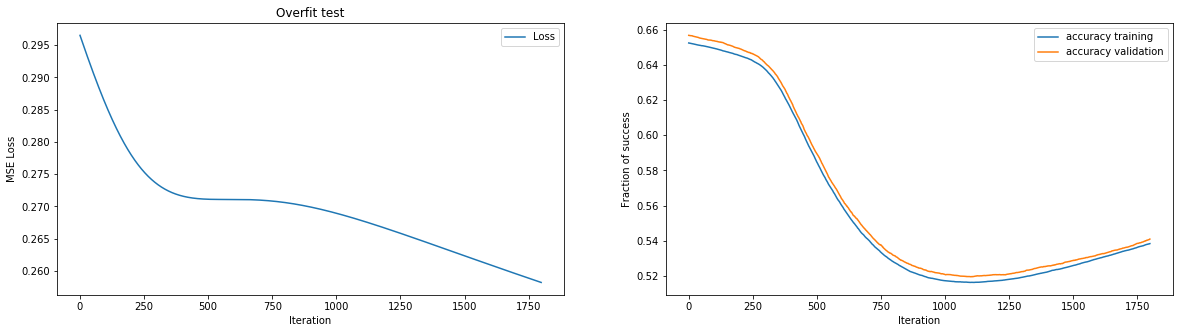

In [80]:
selector = 0
training_plots(tupla_risultati[-1][selector])
selector += 1

In [2]:
#load the goddamn data
y, x, ids_train = load_csv_data('../data/train.csv')
y_train, tx_train = preprocess(
            y, x, "NanToMean", standardize_=True
        )

In [15]:
sigmoid(np.array([5., 1e14, -1e14])).dtype

dtype('float64')

In [3]:
#split the data into train and test:
x_train, y_train, x_test, y_test = split_data(x, y, 0.8, verbose=True, )
y_train = (y_train + 1)/2.
y_test = (y_test + 1)/2.
print('x_train, x_test:', x_train.shape, y_test.shape)
print('y_train, y_test:', y_train.shape, y_test.shape)
print('values of y_train', 'values of y_test', set(y_train), set(y_test))

ration:	 0.8
ratio of samples 1st subset:	 0.34
ratio of samples 2nd subset:	 0.34
x_train, x_test: (200000, 30) (50000,)
y_train, y_test: (200000,) (50000,)
values of y_train values of y_test {0.0, 1.0} {0.0, 1.0}


# Finding a good gamma: 1e-6
That the loglikelihood and the mse loss actually do the same thing (rescaled). 
But the loglikelihood tales a lot more time to compute so better use mse.

In [33]:
clf1 = ClassifierLogisticRegression(
        lambda_=0,
        regularizer=None,
        gamma= 1e-6,
        max_iterations=10000,
        min_max_iterations = 300,
        w_sampling_distr='zero',
        threshold=1e-6,
    )
clf1.train(y_train, x_train, 
        batch_size=-1, 
        verbose = True, 
        tx_validation = x_test, 
        y_validation = y_test, 
        store_gradient=True, 
        store_losses=True,
        normalize_gradient = True)

Regugarizer = None. Setting Lambda to 0
Current iteration=0, loss=0.2212311661078869
Current iteration=100, loss=0.20492042693202667
Current iteration=200, loss=0.20234978432091855
Current iteration=300, loss=0.2007167683908447
Current iteration=400, loss=0.1994385066820951
Current iteration=500, loss=0.19833781268332926
Current iteration=600, loss=0.1973455562880896
Current iteration=700, loss=0.1964309079066011
Current iteration=800, loss=0.19557829765695028
Current iteration=900, loss=0.19477873493507564
Current iteration=1000, loss=0.1940262710894044
Current iteration=1100, loss=0.19331647578140565
Current iteration=1200, loss=0.1926457517552071
Current iteration=1300, loss=0.19201101432363019
Current iteration=1400, loss=0.1914095345059002
Current iteration=1500, loss=0.19083885725770225
Current iteration=1600, loss=0.19029675480195893
Current iteration=1700, loss=0.1897811967187049
Current iteration=1800, loss=0.1892903283113208
Current iteration=1900, loss=0.18882245331326292
Cu

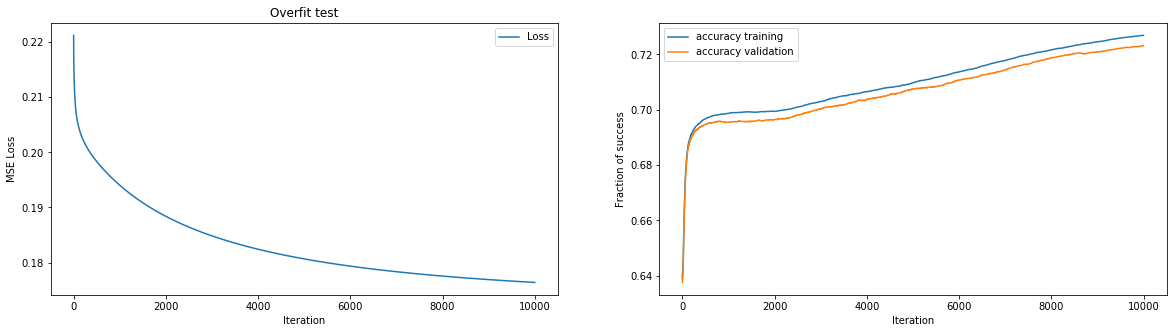

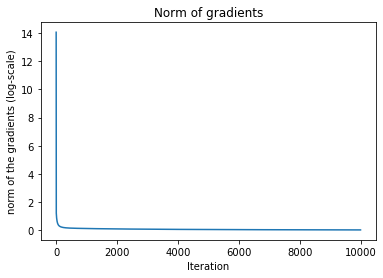

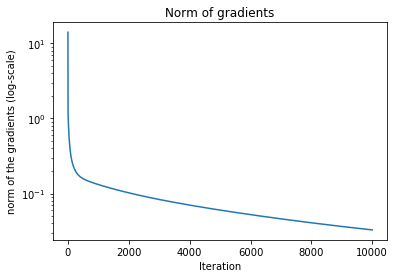

In [37]:
training_plots(clf1, show_gradient=True)
fig = plt.figure()
plt.plot(clf1.params['stored_gradients'])
plt.yscale('log')
plt.ylabel('norm of the gradients (log-scale)')
plt.xlabel('Iteration')
plt.title('Norm of gradients')
plt.show()

# Narrowing the gamma range
The following is just to narrow the range of values to search with a numerical instability arguments.
The best way is to look at values around 1e-6. Maybe higher values of gamma are possible

Regugarizer = None. Setting Lambda to 0
Current iteration=0, loss=0.24924003626908442
Current iteration=100, loss=0.2236866063045439
Regugarizer = None. Setting Lambda to 0
Current iteration=0, loss=0.2694277504338794
Current iteration=100, loss=0.23135409373708093
Regugarizer = None. Setting Lambda to 0
Current iteration=0, loss=0.27801134803591104
Current iteration=100, loss=0.2352557825496895


<Figure size 432x288 with 0 Axes>

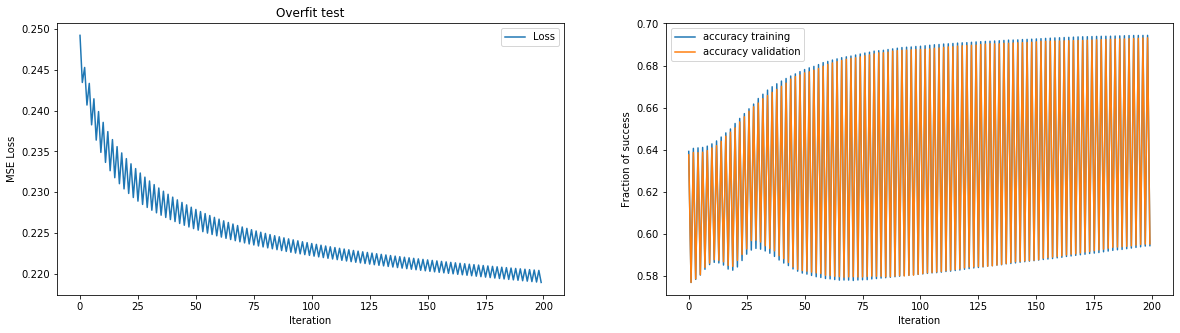

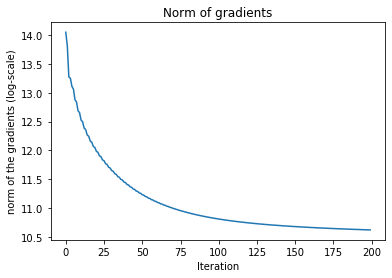

<Figure size 432x288 with 0 Axes>

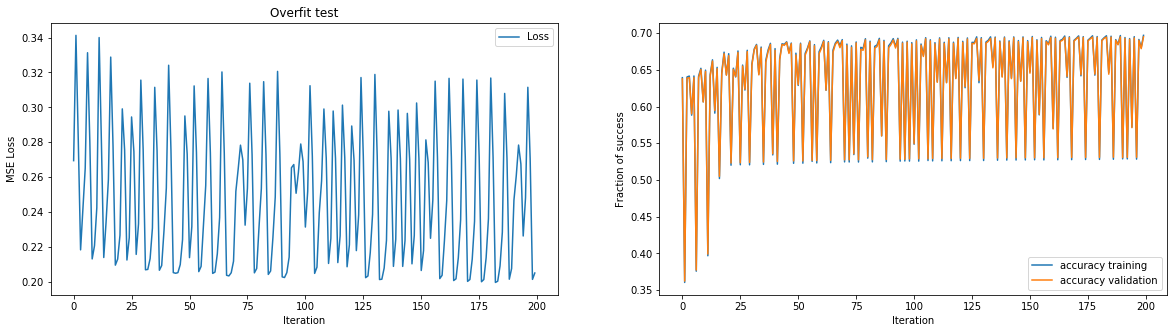

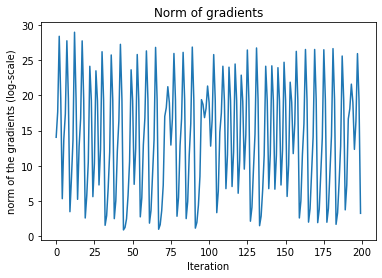

<Figure size 432x288 with 0 Axes>

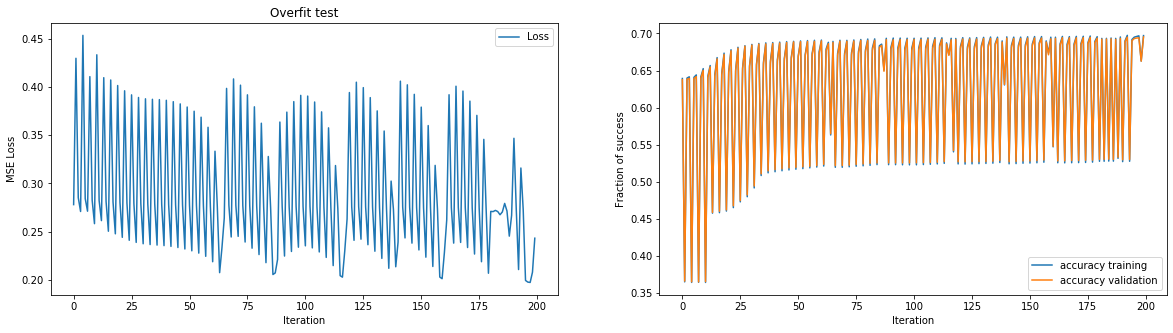

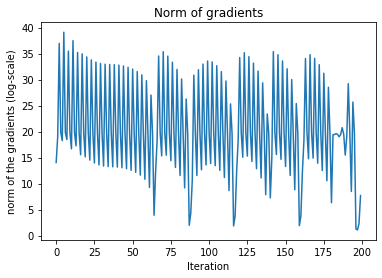

In [41]:
#Gammas bigger than 1e-6
gammas = [2e-6, 3e-6, 4e-6]
clfiers = []
for gamma in gammas:
    clf = ClassifierLogisticRegression(
            lambda_=0,
            regularizer=None,
            gamma= gamma,
            max_iterations=200,
            min_max_iterations = 300,
            w_sampling_distr='zero',
            threshold=1e-6,
        )
    clf.train(y_train, x_train, 
            batch_size=-1, 
            verbose = True, 
            tx_validation = x_test, 
            y_validation = y_test, 
            store_gradient=True, 
            store_losses=True,
            normalize_gradient = True)
    clfiers += [clf]

#plotting stuff
for c in clfiers:
    fig = plt.figure()
    training_plots(c, show_gradient=True)

Regugarizer = None. Setting Lambda to 0
Current iteration=0, loss=0.21976942542268973
Current iteration=100, loss=0.20530376719640414
Regugarizer = None. Setting Lambda to 0
Current iteration=0, loss=0.21896510629299748
Current iteration=100, loss=0.2057321509790267
Regugarizer = None. Setting Lambda to 0
Current iteration=0, loss=0.21894910092166778
Current iteration=100, loss=0.20621989477084357
Regugarizer = None. Setting Lambda to 0
Current iteration=0, loss=0.21985095114986486
Current iteration=100, loss=0.2067893991860055


<Figure size 432x288 with 0 Axes>

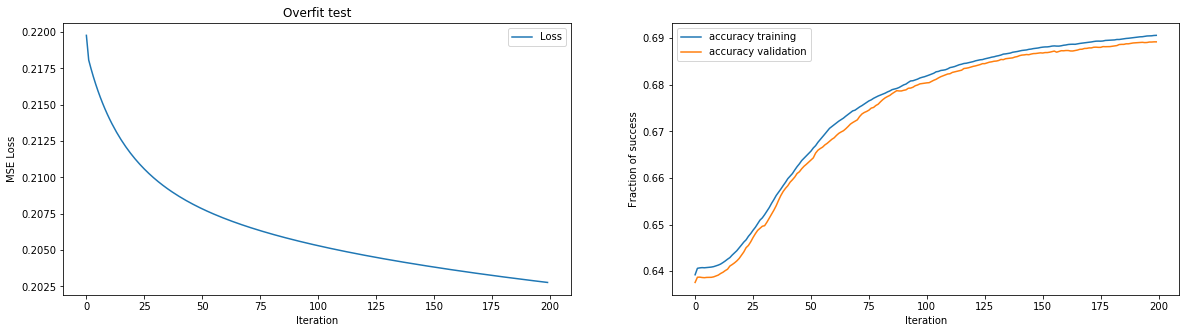

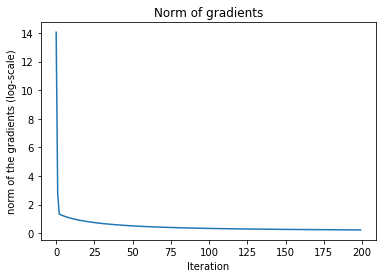

<Figure size 432x288 with 0 Axes>

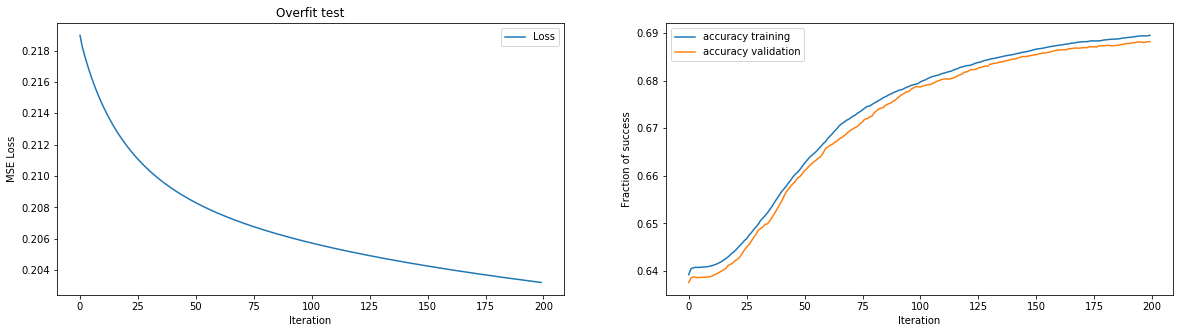

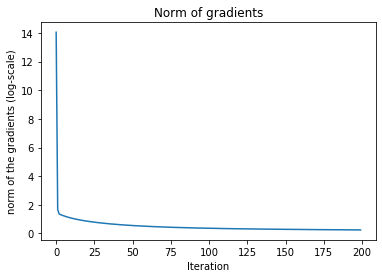

<Figure size 432x288 with 0 Axes>

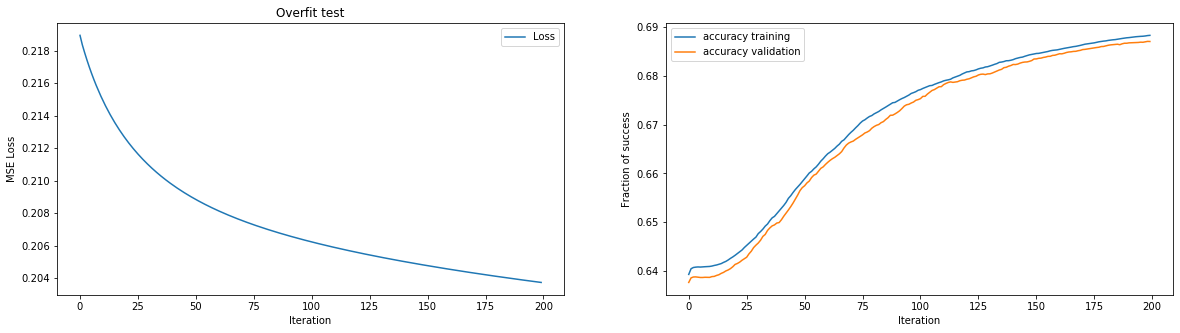

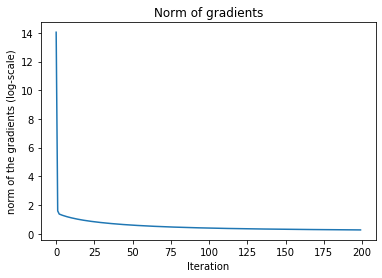

<Figure size 432x288 with 0 Axes>

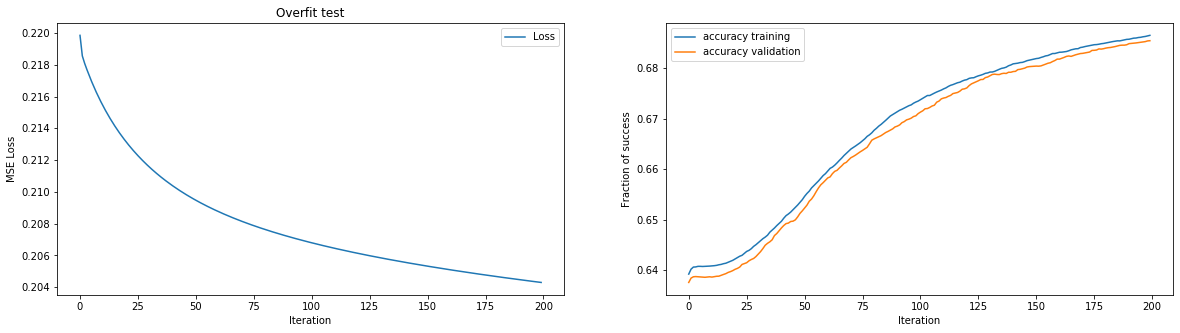

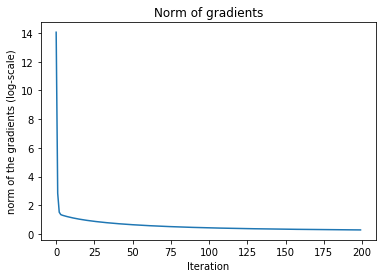

In [42]:
#Gammas smaller than 1e-6
gammas = [9e-7, 8e-7, 7e-7, 6e-7]
clfiers = []
for gamma in gammas:
    clf = ClassifierLogisticRegression(
            lambda_=0,
            regularizer=None,
            gamma= gamma,
            max_iterations=200,
            min_max_iterations = 300,
            w_sampling_distr='zero',
            threshold=1e-6,
        )
    clf.train(y_train, x_train, 
            batch_size=-1, 
            verbose = True, 
            tx_validation = x_test, 
            y_validation = y_test, 
            store_gradient=True, 
            store_losses=True,
            normalize_gradient = True)
    clfiers += [clf]

#plotting stuff
for c in clfiers:
    fig = plt.figure()
    training_plots(c, show_gradient=True)


# Speed up training: using batches:
Batches speed training up quite a bit. What it the best range to do this ? 

Regugarizer = None. Setting Lambda to 0
Current iteration=0, loss=1.7347990109231897
Current iteration=100, loss=1.5643112967062338
Current iteration=200, loss=1.5221455656706429
Current iteration=300, loss=1.4940428968557955
Current iteration=400, loss=1.4740345885867803
Current iteration=500, loss=1.459093546872772
Current iteration=600, loss=1.4475575495472932
Current iteration=700, loss=1.438435462186302
Current iteration=800, loss=1.431092484435028
Current iteration=900, loss=1.4250973042055581
Current iteration=1000, loss=1.4201413297863248
Current iteration=1100, loss=1.4159971559903202
Current iteration=1200, loss=1.412495966065708
Current iteration=1300, loss=1.4095109027158337
Current iteration=1400, loss=1.4069448229248969
Current iteration=1500, loss=1.404722134066687
Current iteration=1600, loss=1.4027833136697156
Current iteration=1700, loss=1.4010810483291003
Current iteration=1800, loss=1.3995774144052495
Current iteration=1900, loss=1.3982417773936142
Current iteration

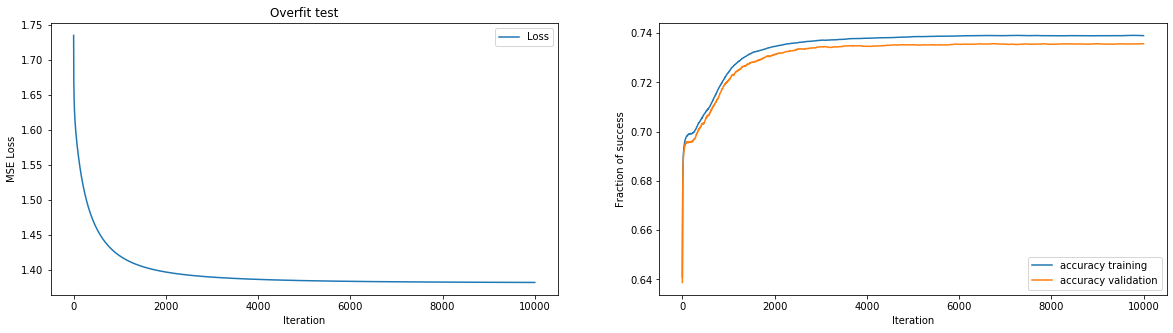

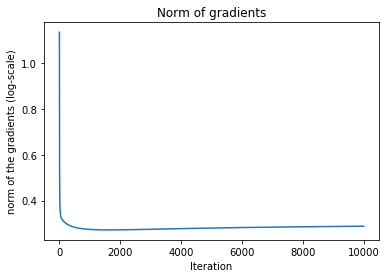

In [50]:
clf = ClassifierLogisticRegression(
            lambda_=0,
            regularizer=None,
            gamma= 1e-6,
            max_iterations=10000,
            min_max_iterations = 300,
            w_sampling_distr='zero',
            threshold=1e-6,
        )
clf.train(y_train, x_train, 
        batch_size= 25000, 
        verbose = True, 
        tx_validation = x_test, 
        y_validation = y_test, 
        store_gradient=True, 
        store_losses=True,
        normalize_gradient = True)

#plotting stuff
training_plots(clf, show_gradient=True)

In [51]:
clf.get_params_and_results(x_train, x_test, y_train, y_test)

{'accuracy_train': 0.73898,
 'accuracy_test': 0.73566,
 'params': {'name': 'LogisticRegression',
  'lambda_': 0,
  'regulairizer': None,
  'gamma': 1e-06,
  'max_iterations': 10000,
  'threshold': 1e-06,
  'weights': array([ 1.22580786e-03, -2.36629112e-02, -5.78991285e-03, -1.65424240e-03,
         -2.17541781e-04,  2.18512349e-03, -4.38346972e-04,  1.48937303e-03,
         -1.28391179e-03,  7.04771404e-03, -1.45698449e-03,  2.70335634e-03,
          3.14172249e-04,  1.87509640e-02, -1.46952623e-07, -2.03033946e-04,
          1.41031768e-03, -1.29490222e-06,  9.87181985e-05,  9.83251281e-03,
          8.90767353e-05, -1.89345022e-03, -7.56598217e-04,  1.31539813e-03,
         -5.00538356e-04, -4.60250836e-04, -1.56715332e-03, -4.08805849e-05,
         -1.05088360e-04, -1.31135453e-02]),
  'normalize_gaddient': True,
  'losses': [1.7347990109231897,
   1.7053671649217614,
   1.6891044147925738,
   1.6780078538604977,
   1.669877257728471,
   1.66358851519058,
   1.658506100176347,
   1

In [52]:
batch_sizes = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000]
clfiers_batches = []
for b in batch_sizes:
        clf = ClassifierLogisticRegression(
                lambda_=0,
                regularizer=None,
                gamma= 1e-6,
                max_iterations= 5000,
                min_max_iterations = 300,
                w_sampling_distr='zero',
                threshold=1e-6,
                )
        clf.train(y_train, x_train, 
                batch_size= b, 
                verbose = False, 
                tx_validation = x_test, 
                y_validation = y_test, 
                store_gradient=True, 
                store_losses=True,
                normalize_gradient = True)
        clfiers_batches += [clf]


Regugarizer = None. Setting Lambda to 0
Regugarizer = None. Setting Lambda to 0
Regugarizer = None. Setting Lambda to 0
Regugarizer = None. Setting Lambda to 0
Regugarizer = None. Setting Lambda to 0
Regugarizer = None. Setting Lambda to 0
Regugarizer = None. Setting Lambda to 0
Regugarizer = None. Setting Lambda to 0


<Figure size 432x288 with 0 Axes>

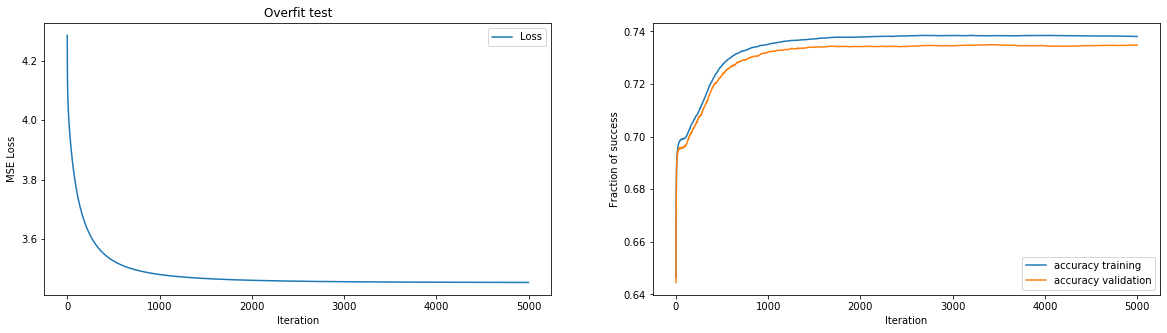

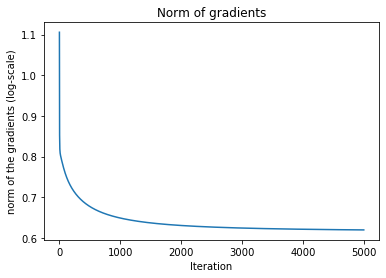

Batch size 10000 test accuracy:	 0.733595 train accuracy:	 0.73014


<Figure size 432x288 with 0 Axes>

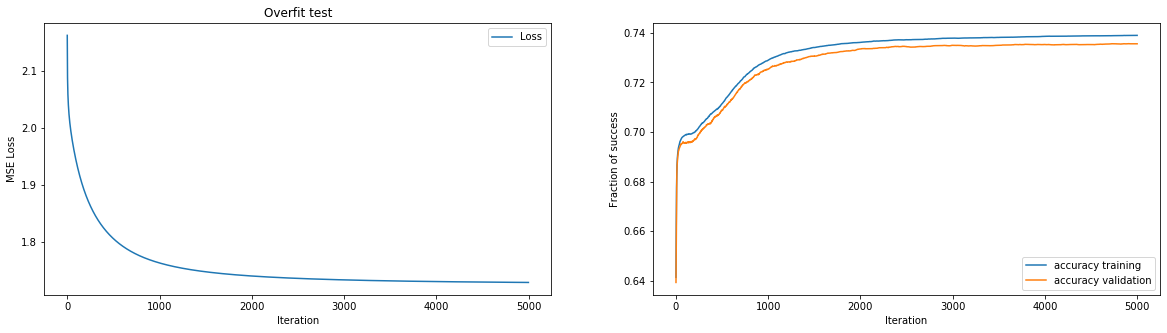

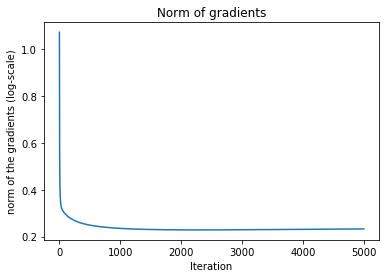

Batch size 20000 test accuracy:	 0.733595 train accuracy:	 0.73014


<Figure size 432x288 with 0 Axes>

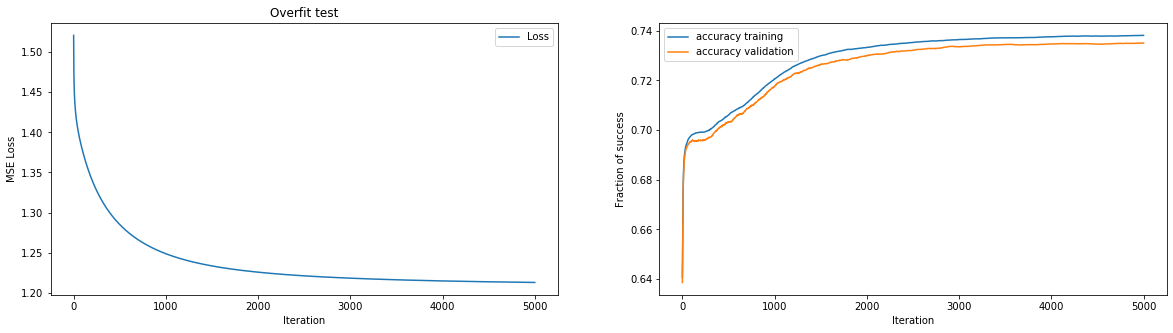

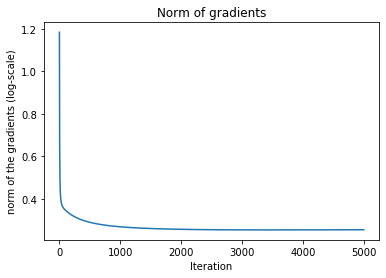

Batch size 30000 test accuracy:	 0.733595 train accuracy:	 0.73014


<Figure size 432x288 with 0 Axes>

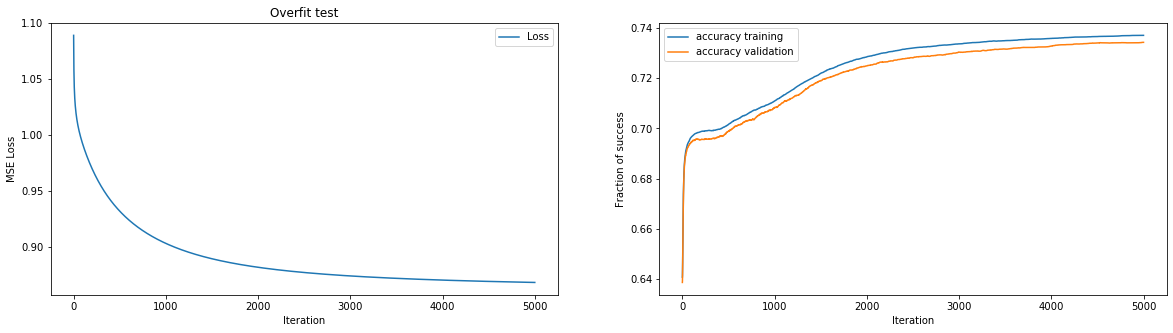

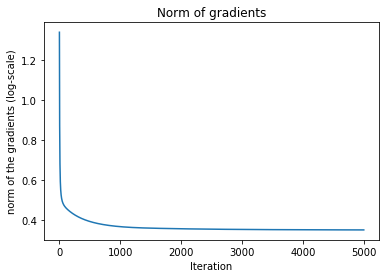

Batch size 40000 test accuracy:	 0.733595 train accuracy:	 0.73014


<Figure size 432x288 with 0 Axes>

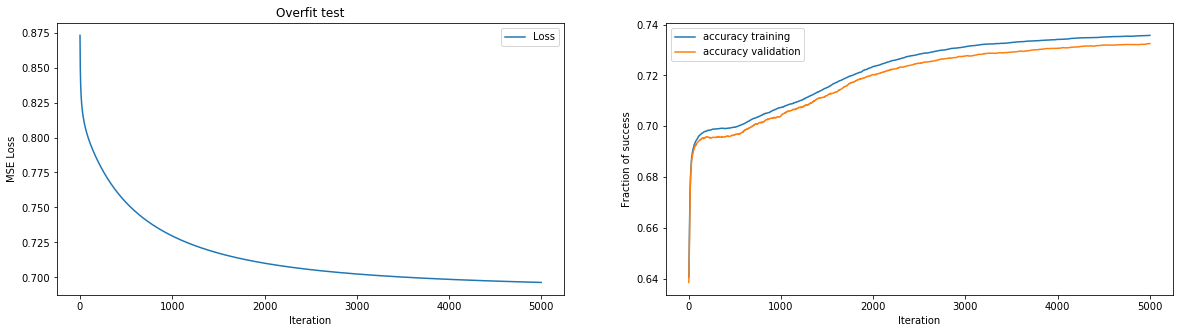

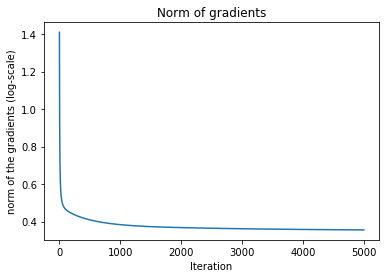

Batch size 50000 test accuracy:	 0.733595 train accuracy:	 0.73014


<Figure size 432x288 with 0 Axes>

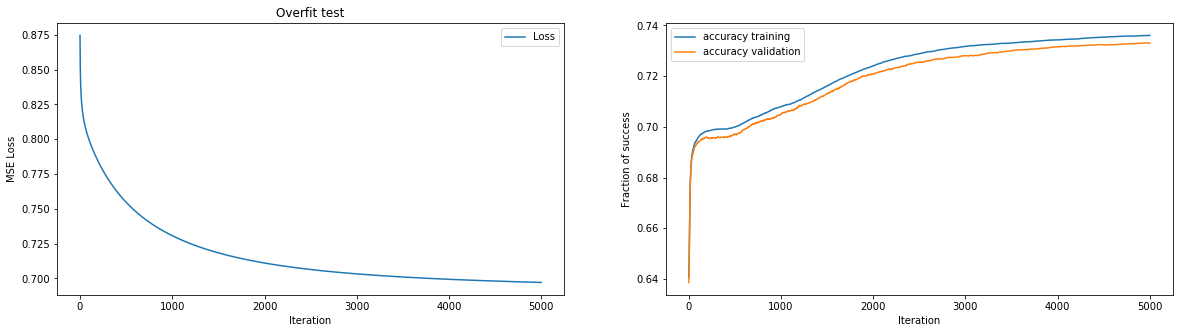

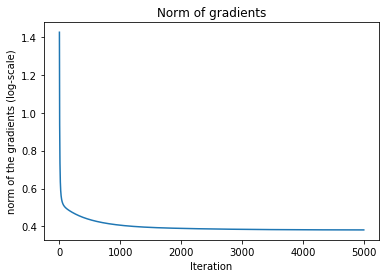

Batch size 60000 test accuracy:	 0.733595 train accuracy:	 0.73014


<Figure size 432x288 with 0 Axes>

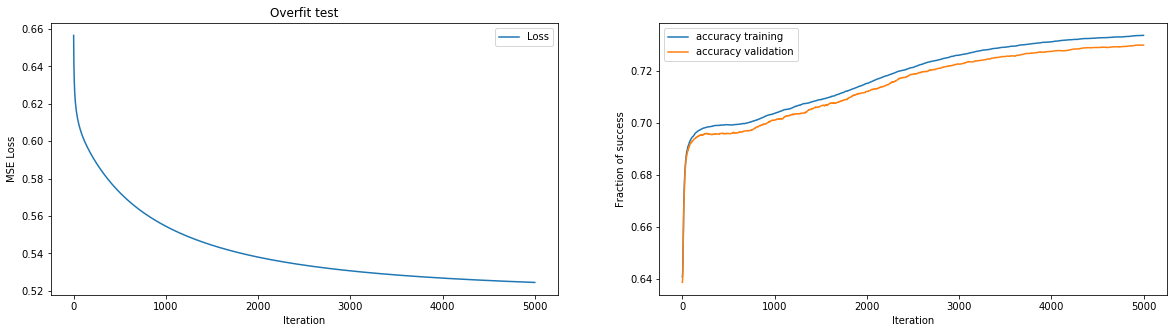

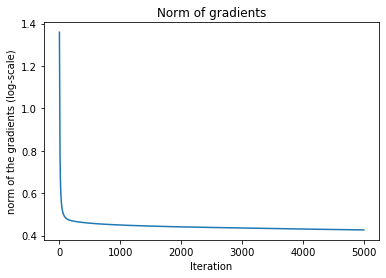

Batch size 70000 test accuracy:	 0.733595 train accuracy:	 0.73014


<Figure size 432x288 with 0 Axes>

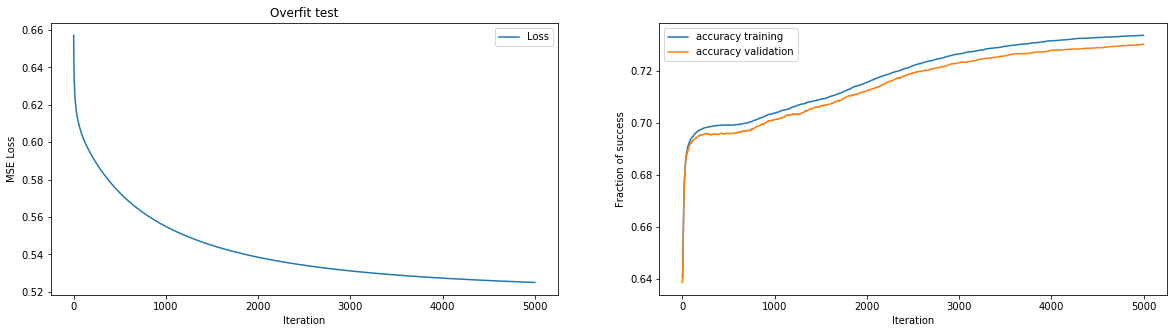

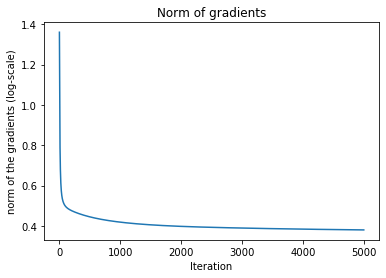

Batch size 80000 test accuracy:	 0.733595 train accuracy:	 0.73014


In [54]:
#plotting stuff
for c, b in zip(clfiers_batches, batch_sizes):
        fig = plt.figure()
        training_plots(c, show_gradient=True)
        te = clf.get_params_and_results(x_train, x_test, y_train, y_test)['accuracy_train']
        tr = clf.get_params_and_results(x_train, x_test, y_train, y_test)['accuracy_test']
        print('Batch size', b, 'test accuracy:\t', te, 'train accuracy:\t', tr)

Text(0.5, 1.0, 'Batch sizes affects the convergence of the algo')

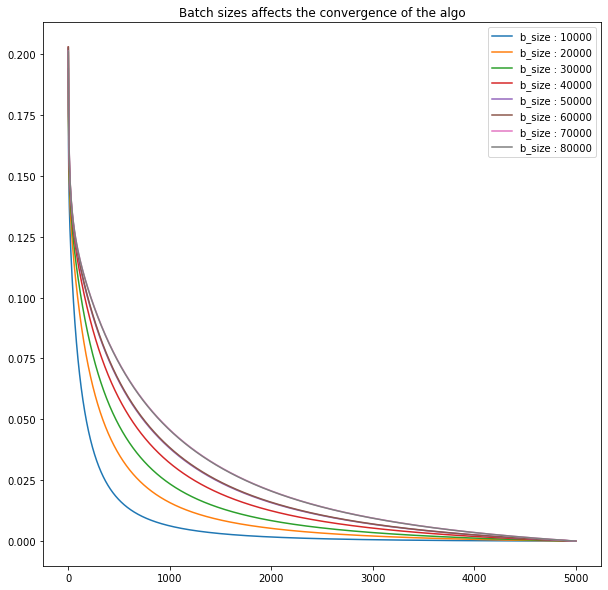

In [73]:
# different batch sizes summary plot:
#plotting stuff
fig = plt.figure(figsize=(10, 10))
for c, b in zip(clfiers_batches, batch_sizes):
        minimum = min(c.params['losses'])
        maximum = max(c.params['losses'])
        losses = c.params['losses']
        losses = (losses - minimum)/maximum
        zoom = 0
        plt.plot(zoom + np.arange(len(losses[zoom:])), losses[zoom:], label = "b_size : " +str(b))
        plt.legend()
plt.title("Batch sizes affects the convergence of the algo")

In [75]:
clfiers[0].params.keys()

dict_keys(['name', 'lambda_', 'regulairizer', 'gamma', 'max_iterations', 'threshold', 'weights', 'normalize_gaddient', 'losses', 'accuyracues_while_training_train', 'accuyracues_while_training_validation', 'stored_gradients', 'initial_w', 'w_sampling_distr'])

Text(0, 0.5, 'Accuracy on test set')

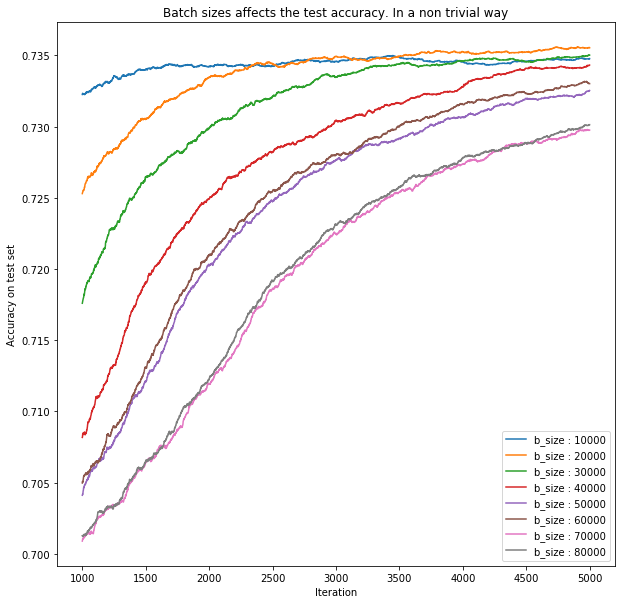

In [80]:
# different batch sizes summary plot:
#plotting stuff
fig = plt.figure(figsize=(10, 10))
for c, b in zip(clfiers_batches, batch_sizes):
        losses = c.params['accuyracues_while_training_validation']
        zoom = 1000
        plt.plot(zoom + np.arange(len(losses[zoom:])), losses[zoom:], label = "b_size : " +str(b))
        plt.legend()
plt.title("Batch sizes affects the test accuracy. In a non trivial way")
plt.xlabel("Iteration")
plt.ylabel('Accuracy on test set')

## Does the batch size affect the gamma range ? 
We don't know. Possibly yes

# Other stuff

In [ ]:
from logReg_gridSearch import *
gss = GridSearch_Simulation('../data/train.csv', '../data/test.csv') 
acc_tr, acc_te, losses_tr, losses_te  = gss.train_model(dataset, l_rate, b_size, initial_w_dist)

In [20]:
clf.get_params_and_results(x_train, x_test, y_train, y_test)

{'accuracy_train': 0.69169,
 'accuracy_test': 0.69242,
 'params': {'name': 'LogisticRegression',
  'lambda_': 0,
  'regulairizer': None,
  'gamma': 1e-10,
  'max_iterations': 1800,
  'threshold': 0,
  'weights': array([-0.01843706, -0.89697075, -0.02075554, -0.25920814,  0.56148697,
          0.10750221,  0.76100716,  0.20950545, -0.84842473, -0.50201431,
         -0.64809637, -0.11197115, -0.02858168,  0.7618703 , -0.90262245,
          0.6490594 ,  0.01546187,  0.32066341,  0.90402211, -0.23952832,
          0.57396276,  0.59472485, -0.56803769,  0.2199465 ,  0.16666141,
         -0.39056725, -0.95293877, -0.18431507, -0.24476245, -0.0511362 ]),
  'losses': [0.3781970988869389,
   0.37807129908995385,
   0.37795257231070273,
   0.3778489728012784,
   0.37772177647440797,
   0.37759532768977855,
   0.3775162505757743,
   0.3774361555566297,
   0.3773128746056228,
   0.37718437439426333,
   0.3770480658670966,
   0.3768968469250383,
   0.3767073682217996,
   0.37651822200518603,
   0.3